In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from jupyterthemes import jtplot
jtplot.style(theme='gruvboxd', context='paper', spines=True, 
             ticks=True, grid=True, gridlines='dotted', figsize=(6,4.5))

In [13]:
train=pd.read_csv('data/data/titanic1/train.csv')
train
test=pd.read_csv('data/data/titanic1/test.csv')
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [17]:
## 탐색적 분석 (EDA:Exploratory Data Analysis)
train.head(50)
train.info()
# 결측치가 있는 column 확인 
test.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float

In [21]:
train.isnull().sum() # 표준편차부터 최대값까지  표출
train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [23]:
train.groupby('Sex')['Survived'].mean() # 생존률 구하기
train.pivot_table(index='Sex', values='Survived', aggfunc=np.mean) # index, values


Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [24]:
train.pivot_table(index='Sex') # values 주지 않으면 모든 칼럼에 적용되어버림 

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
Sex,,,,,,,
female,27.915709,44.479818,0.649682,431.028662,2.159236,0.694268,0.742038
male,30.726645,25.523893,0.235702,454.147314,2.389948,0.429809,0.188908


In [27]:
train.groupby('Sex')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
female,314.0,0.742038,0.438211,0.0,0.0,1.0,1.0,1.0
male,577.0,0.188908,0.391775,0.0,0.0,0.0,0.0,1.0


In [29]:
# 성별, 선실등급별 생존률 출력 
train.groupby('Pclass')['Survived'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,0.629630,0.484026,0.0,0.0,1.0,1.0,1.0
2,184.0,0.472826,0.500623,0.0,0.0,0.0,1.0,1.0
3,491.0,0.242363,0.428949,0.0,0.0,0.0,0.0,1.0


In [41]:
train.pivot_table('Survived', ['Sex', 'Pclass'], aggfunc=np.mean) # (values, index)

Survived
Sex    Pclass          
female 1       0.968085
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

In [47]:
test['Survived']=(test.Sex=='female') & (test.Age > 0) & (test.Embarked)
test.head()
# test['Servived']=(test)
test.isnull().sum()

submission=test[['PassengerId','Survived']].copy() # 그대로 카피 \
submission

,PassengerId,Survived
0,892,False
1,893,True
2,894,False
3,895,False
4,896,True
5,897,False
6,898,True
7,899,False
8,900,True
9,901,False


In [52]:
# 습관적 작업
submission['Survived']=submission['Survived'].astype(int)
submission.head()
# 맨 왼쪽 인덱스 번호 지워 내야함
submission.to_csv('submission.csv', index=False)


In [53]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

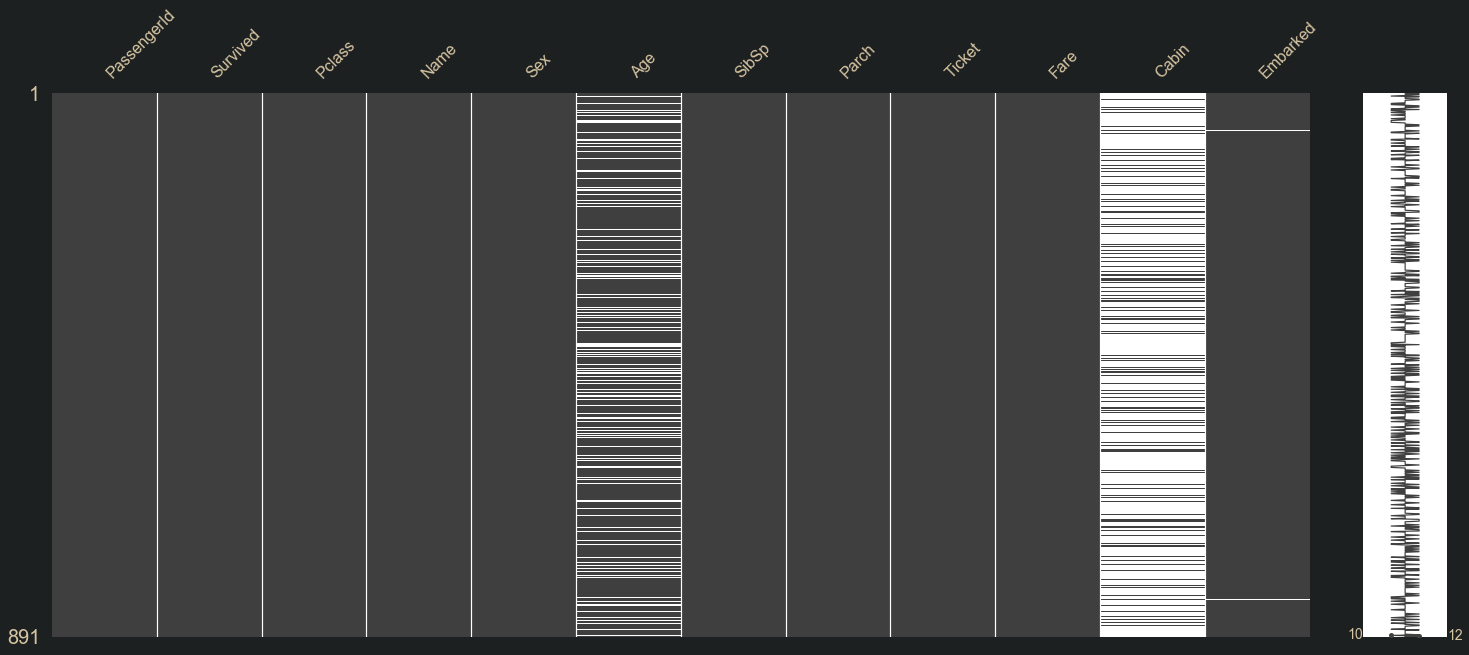

In [58]:
import missingno as msno # missing데이터를 시각화하여 편히 보게 하기 위한 도구
msno.matrix(train)
# age, cabin 컬럼 - 흰색색상표시 : 결측치에 해당함 // missing data 확인에 능함! 
# msno.matrix(test)

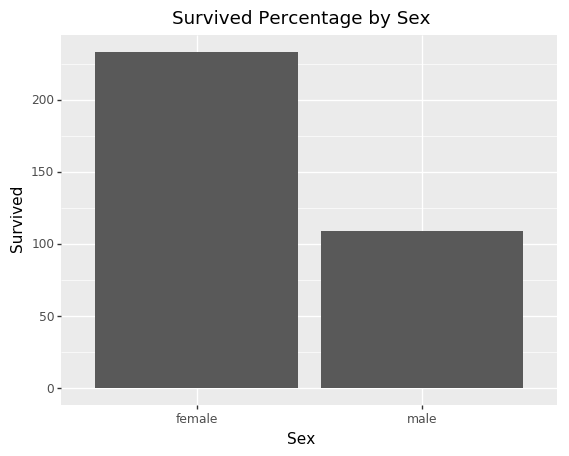

<ggplot: (141779051128)>

In [71]:
from plotnine import *
# ggplot 사용가능, 가동성 높아 
(ggplot(train) # 축에 대한 기준을 명시해주어야한다 
 + aes(x='Sex',y='Survived')  # 축을 부여한 , y축에 survived
 + geom_col()
 + ggtitle('Survived Percentage by Sex')
 + theme(text=element_text(family='NanumBarunGothic'))
)

In [65]:
# print("im so starving right now")

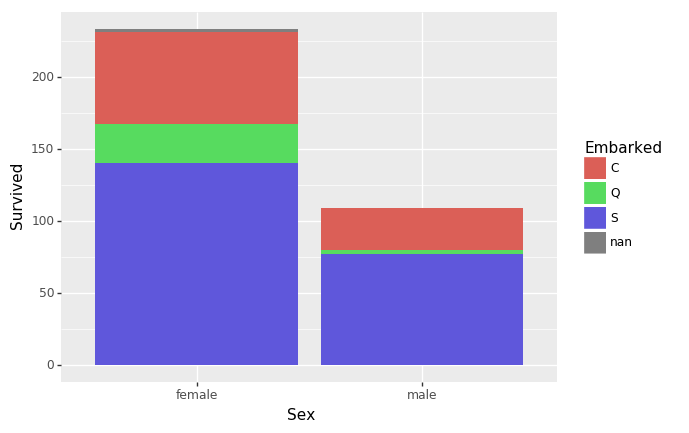

<ggplot: (-9223371895072170401)>

In [72]:
(ggplot(train) # 축에 대한 기준을 명시해주어야한다 
 + aes(x='Sex',y='Survived', fill='Embarked')  # 축을 부여한 , y축에 survived
 + geom_col()
)

In [76]:
# Pclass 별로 데이터 건수 출력 
train['Pclass'].value_counts

<bound method IndexOpsMixin.value_counts of 0      3
1      1
2      3
3      1
4      3
5      3
6      1
7      3
8      3
9      2
10     3
11     1
12     3
13     3
14     3
15     2
16     3
17     2
18     3
19     3
20     2
21     2
22     3
23     1
24     3
25     3
26     3
27     1
28     3
29     3
      ..
861    2
862    1
863    3
864    2
865    2
866    2
867    1
868    3
869    3
870    3
871    1
872    1
873    3
874    2
875    3
876    3
877    3
878    3
879    1
880    2
881    3
882    3
883    2
884    3
885    3
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: int64>

In [77]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [79]:
train.info()
# 정수 -> 문자형
train['Pclass']=train['Pclass'].astype('str')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


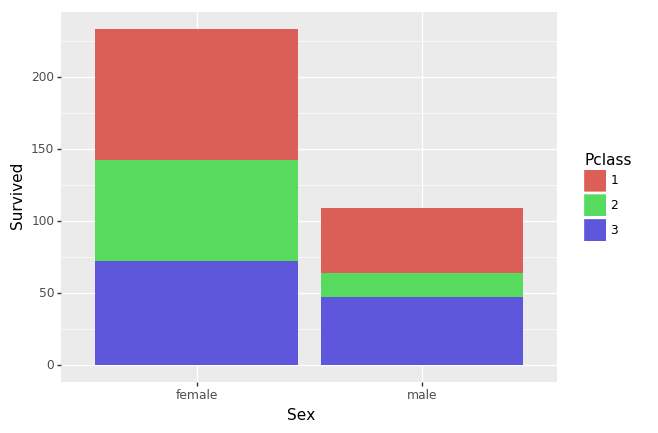

<ggplot: (141782525255)>

In [80]:
train['Survived']=train['Survived']
(ggplot(train) # 축에 대한 기준을 명시해주어야한다 
 + aes(x='Sex',y='Survived', fill='Pclass')  # 축을 부여한 , y축에 survived
 + geom_col()
)

In [81]:
# train data [age] 컬럼에 대한 값이 결측치가 많으므로 이에 대해 제거하겠다
train_drop_age=train['Age'].dropna()
train_drop_age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


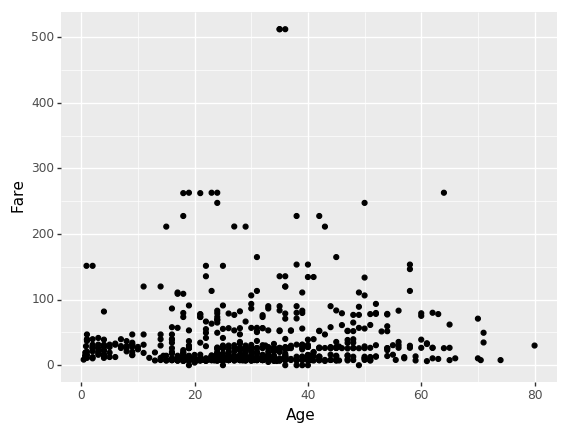

<ggplot: (141782874253)>

In [86]:
(ggplot(train) 
+ aes(x='Age', y='Fare')
+ geom_point()
)
# 해당 도메인에 대한 정보가 전무할 시 시각화를 통해 간단 분별가능 


C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


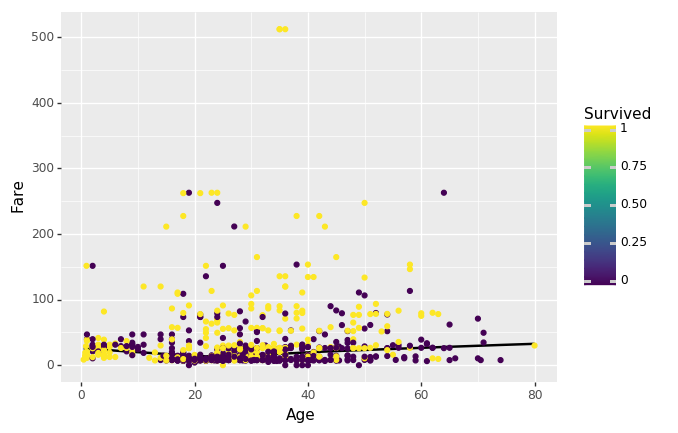

<ggplot: (141783171911)>

In [88]:
# 연령대(x)와 운임(y) 생존률 을 시각화를 통해 알아보자 
(ggplot(train) 
+ aes(x='Age', y='Fare', color='Survived')
+ stat_smooth()
+ geom_point()
)
# fare가 높으면 높을수록 생존한 사람수 가 많아보인다 
# 회귀선 하나가 추가되었다 ( sta_smooth )
# 속성 추가 


C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


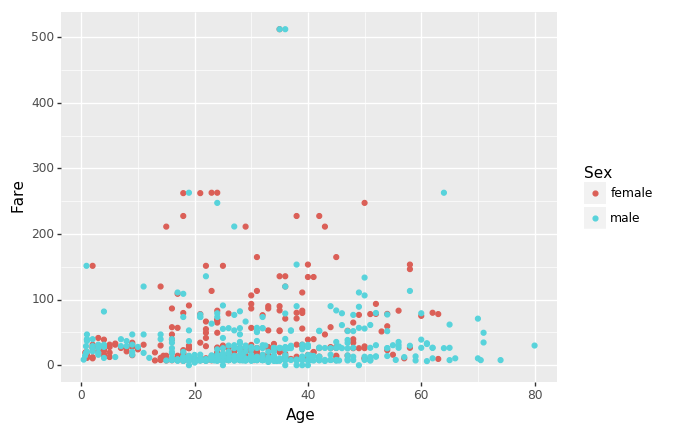

<ggplot: (-9223371895071348557)>

In [89]:
(ggplot(train) 
+ aes(x='Age', y='Fare', color='Sex')
+ geom_point()
)
# 범례에 주목하라 ( 성별로 이분과 구분 )
# 

C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\stats\smoothers.py:146: UserWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  warnings.warn("Confidence intervals are not yet implemented"
C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:449: UserWarning: geom_point : Removed 177 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


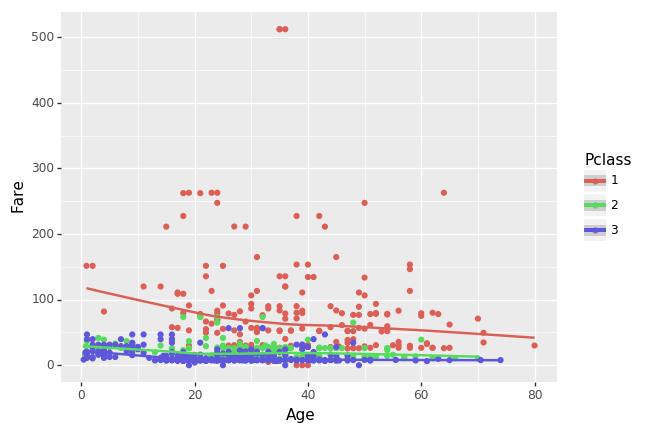

<ggplot: (-9223371895071348669)>

In [90]:
(ggplot(train) 
+ aes(x='Age', y='Fare', color='Pclass')
+ geom_point()
+ stat_smooth()
)

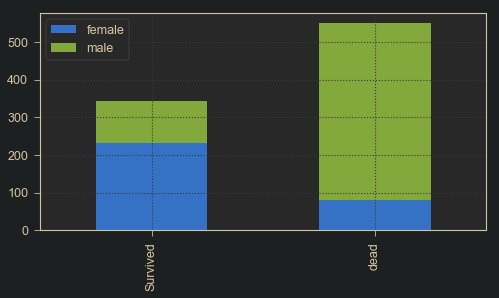

In [111]:
def bar_chart(f):
    survived=train[train['Survived']==1][f].value_counts()
    dead=train[train['Survived']==0][f].value_counts()
    df=pd.DataFrame([survived, dead])
    df.index=['Survived', 'dead']
    #print(df)
    #df.plot(kind='bar')
    df.plot(kind='bar', stacked=True, figsize=(8,4))

bar_chart('Sex') #성별에 따른 생존자수를 막대그래프
    

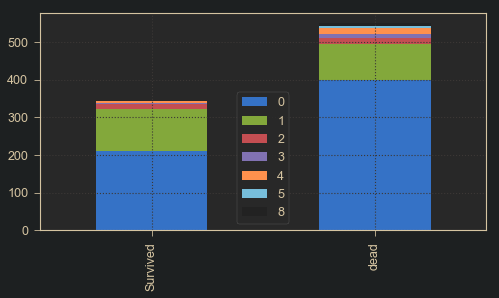

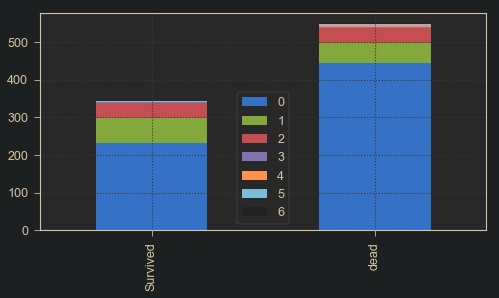

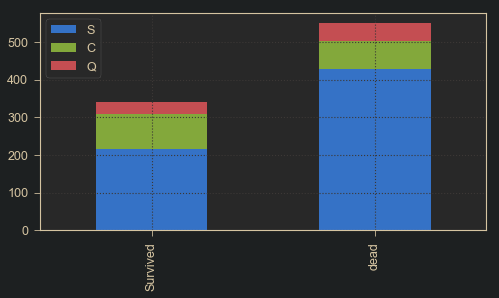

In [112]:
bar_chart('SibSp')
bar_chart('Parch')
bar_chart('Embarked')

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


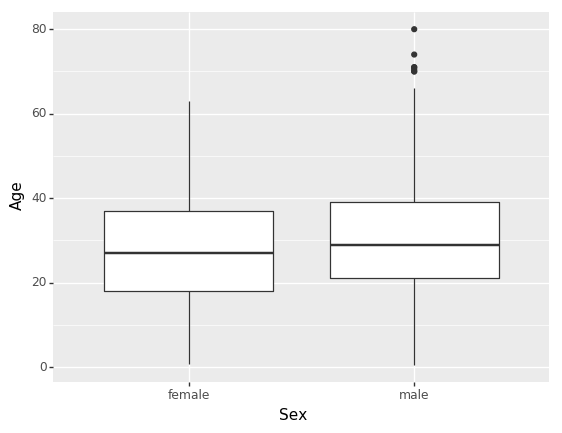

<ggplot: (141782453701)>

In [113]:
(ggplot(train)
+aes(x='Sex',y='Age')
+geom_boxplot()
)

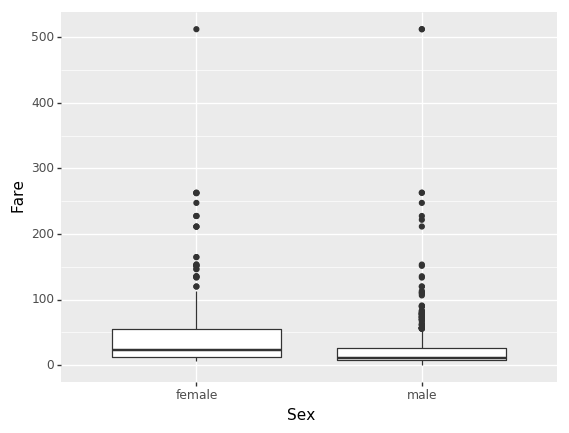

<ggplot: (141781137037)>

In [114]:
(ggplot(train)
+aes(x='Sex',y='Fare',fill='Survived')
+geom_boxplot()
)

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


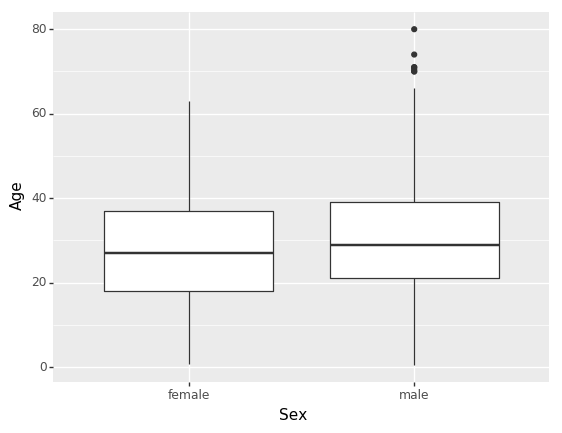

<ggplot: (141782371164)>

In [117]:
(ggplot(train)
+ aes(x='Sex',y='Age')
+ geom_boxplot()
)

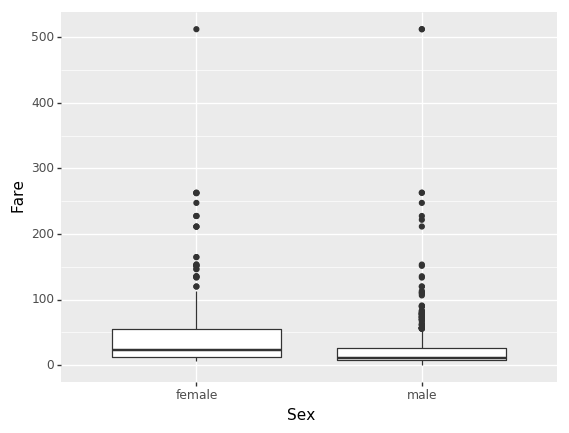

<ggplot: (-9223371895070998819)>

In [118]:
(ggplot(train)
+aes(x='Sex', y='Fare', fill='Survived')
 +geom_boxplot()
)

C:\Users\user\Anaconda3\lib\site-packages\plotnine\layer.py:360: UserWarning: stat_boxplot : Removed 177 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
C:\Users\user\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


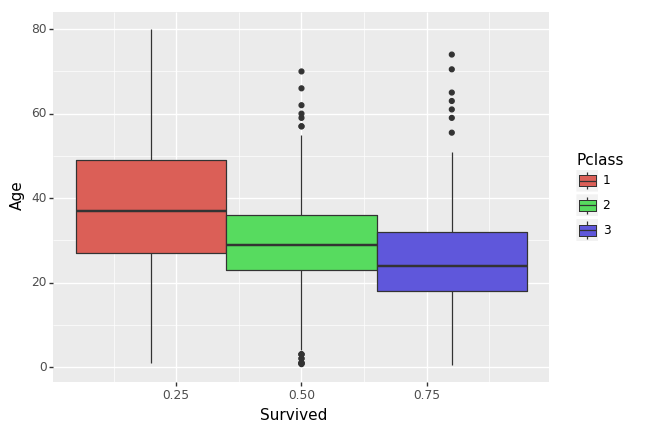

<ggplot: (141783176491)>

In [122]:
(ggplot(train)
+ aes(x='Survived', y='Age', fill='Pclass')
+ geom_boxplot()
)

In [120]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 83.6+ KB


In [123]:
train['Age_median']=train['Age']
train['Age_mean']=train['Age']
train['Age_mode']=train['Age']

In [124]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_median     714 non-null float64
Age_mean       714 non-null float64
Age_mode       714 non-null float64
dtypes: float64(5), int64(4), object(6)
memory usage: 104.5+ KB


In [130]:
train['Age_median']=train['Age_median'].fillna(train['Age_median'].median())
train['Age_mean'].fillna(train['Age_mean'].mean(), inplace=True)
# train.info()

train['Age_mode'].fillna(train['Age_mode'].mode()[0], inplace=True)
# 함수의 수행결과가 series로 도출됨 
# mean. median => 

# print(train['Age_mode'].mode())
# print(train['Age_mode'].mean())
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null object
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Age_median     891 non-null float64
Age_mean       891 non-null float64
Age_mode       891 non-null float64
dtypes: float64(5), int64(4), object(6)
memory usage: 104.5+ KB


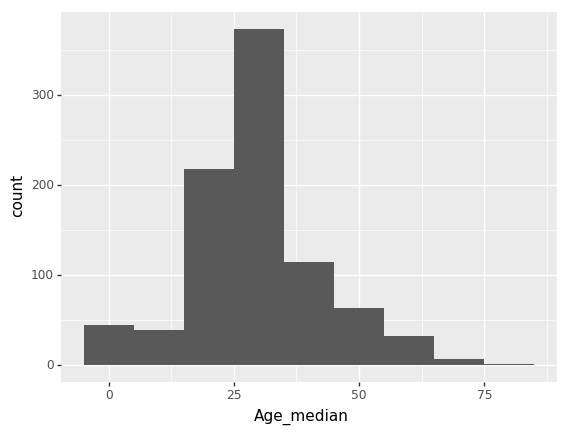

<ggplot: (141781212648)>

In [135]:
# 연령대별 분포
# train['Age']
# train['Age'].min()
(ggplot(train)
+ aes(x='Age_median')
+ geom_histogram(binwidth=10) # 10개로 구간 나눠준다 
) # 각구간별로 count가 default로 도출 

In [158]:
# train # titanic
# test # survived 열 존재 유무 차이 
train_test_data=[train,test]
train_test_data
# train data 칼럼 얀딜이 븥여놓기

for data in train_test_data: # 2번 반복한다 # 1번 반복할때마다 df 읽어옴
   
    temp=data['Name'].str.split(',').str[1]
# temp
nick=temp.str.split('.').str[0]
# nick
nick_val=nick.value_counts(sort=True).head(10)
nick_val

    # 1번 문제 
    # Name 칼럼에서 정규표현식 사용하여 호칭을 추출하고, 
    # 호칭별로 데이터 몇건씩 있는지 데이터 건수 출력
    
    # 출력 예시(test, train)
    # Mr 500 
    # Miss 200  
    # ...........
    # Sir 1 

    # 2번 문제 
    # Mr : 0, Miss : 1, Mrs : 2, 나머지는 모두 3으로 처리 
    # 별도의 컬럼을 추가해서 저장 
    

 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dona        1
 Dr          1
Name: Name, dtype: int64

In [141]:
    # 1번 문제 
    # Name 칼럼에서 정규표현식 사용하여 호칭을 추출하고, 
    # 호칭별로 데이터 몇건씩 있는지 데이터 건수 출력
    
    # for 문 
    # apply 함수 
    
    # 출력 예시(test, train)
    # Mr 500 // Miss 200 // # ... // Sir 1 
    # ................\
    # Sir 1 
    
# df[1].apply(myexp, n=3)
for data in train_test_data: # 2번 반복한다 # 1번 반복할때마다 df 읽어옴
   
    pat=re.compile("(\d{6})[-]\d{7}") # - 기호가 반드시 있어야한다 # 왼쪽 여섯자리
pat.sub("\g<1>-*******", data) # abbr.pattern : pat


IndentationError: expected an indented block (<ipython-input-141-7cf20d9bdddc>, line 12)

In [ ]:
    # 2번 문제 
    # Mr : 0, Miss : 1, Mrs : 2, 나머지는 모두 3으로 처리 
    # 별도의 컬럼을 추가해서 저장 